In [4]:
import torch
import argparse
import os.path
import matplotlib.pyplot as plt
#from ddsm import noise_factory
import numpy as np

In [5]:
# Replace 'path_to_your_file.pth' with the actual path to your .pth file
file_path = '/home/fe/twang/ddsm-main/sudoku/steps400.cat9.time1.0.samples50000.pth'
#/home/fe/twang/ddsm-main/sudoku/steps400.cat9.time1.0.samples50000.pth

# Load the object (Could be a model, tensor, or any serializable object)
loaded_object = torch.load(file_path)
print(type(loaded_object), len(loaded_object))

v_one= loaded_object[0]
v_zero= loaded_object[1]
v_one_loggrad= loaded_object[2]
v_zero_loggrad= loaded_object[3]
timepoints= loaded_object[4]

<class 'tuple'> 5


In [6]:
################# for 9 classes with with scatter ###################
    
def visualize_diffusion_scatter(timepoints, samples, plot_name, title="Diffusion Process", num_samples_to_plot=1000):
    # """
    # Visualize the diffusion process at different time points.
    
    # Parameters:
    # - timepoints: A tensor containing the time points.
    # - samples: A tensor containing the samples at different time points. 
    # - title: Title of the plot.
    # - num_samples_to_plot: Number of samples to plot for visualization.
    # """
    # Ensure we don't try to plot more samples than we have
    num_samples_to_plot = min(num_samples_to_plot, samples.shape[0]) #from 1000 to 50000, here is 1000
    #num_samples_to_plot = 400
    
    plt.figure(figsize=(12, 8))
    new_timepoints = torch.repeat_interleave(timepoints, repeats=8, dim=0)
    new_timepoints = new_timepoints.reshape(400,8)
    print(new_timepoints.shape)
        
    for i, t in enumerate(timepoints):
        # Assuming samples are 2-dimensional for visualization
        #plt.scatter(samples[:num_samples_to_plot, i, 0], samples[:num_samples_to_plot, i, 1], s=1, alpha=0.6, label=f"t={t:.2f}")
        #print(samples[:num_samples_to_plot, i, 0].shape)
        
        #print(new_timepoints[i, :].shape, samples[0, i, :].shape)
        #plt.scatter(timepoints[i], samples[0, i, 0], s=1, alpha=0.6)
        plt.scatter(new_timepoints[i, :], samples[0, i, :], s=1, alpha=0.6)
        
    
    plt.title(title)
    plt.xlabel("Time(t)")
    plt.ylabel("Xt")
    plt.legend()
    #plt.savefig(f'/home/fe/twang/ddsm-main/sudoku/{plot_name}.png')
    plt.show()
#versuche plt.plot(t,X) mit t=torch,arange(1000+1)/1000
#also t mit so vielen schritten wie du gemacht hast

In [20]:
################# for 9 classes with with scatter ###################
    
def visualize_diffusion_scatter(timepoints, samples, plot_name, title="Diffusion Process", num_samples_to_plot=1000):
    # """
    # Visualize the diffusion process at different time points.
    
    # Parameters:
    # - timepoints: A tensor containing the time points.
    # - samples: A tensor containing the samples at different time points. 
    # - title: Title of the plot.
    # - num_samples_to_plot: Number of samples to plot for visualization.
    # """
    # Ensure we don't try to plot more samples than we have
    num_samples_to_plot = min(num_samples_to_plot, samples.shape[0]) #from 1000 to 50000, here is 1000
    #num_samples_to_plot = 400
    
    plt.figure(figsize=(12, 8))
   # new_timepoints = torch.repeat_interleave(timepoints, repeats=8, dim=0)
    t = torch.arange(400)/400
    #new_timepoints = new_timepoints.reshape(400,8)
    #print(new_timepoints.shape)
    print('samples',samples.shape)
        
    for i in range(samples.shape[-1]):
        # Assuming samples are 2-dimensional for visualization
        #plt.scatter(samples[:num_samples_to_plot, i, 0], samples[:num_samples_to_plot, i, 1], s=1, alpha=0.6, label=f"t={t:.2f}")
        #print(samples[:num_samples_to_plot, i, 0].shape)
        
        #print(new_timepoints[i, :].shape, samples[0, i, :].shape)
        #plt.scatter(timepoints[i], samples[0, i, 0], s=1, alpha=0.6)
        #plt.scatter(new_timepoints[i, :], samples[0, i, :], s=1, alpha=0.6)
        plt.plot(t, samples[0, :,i])
    
    plt.title(title)
    plt.xlabel("Time(t)")
    plt.ylabel("Xt")
    plt.legend()
    #plt.savefig(f'/home/fe/twang/ddsm-main/sudoku/{plot_name}.png')
    plt.show()
#versuche plt.plot(t,X) mit t=torch,arange(1000+1)/1000
#also t mit so vielen schritten wie du gemacht hast

hello


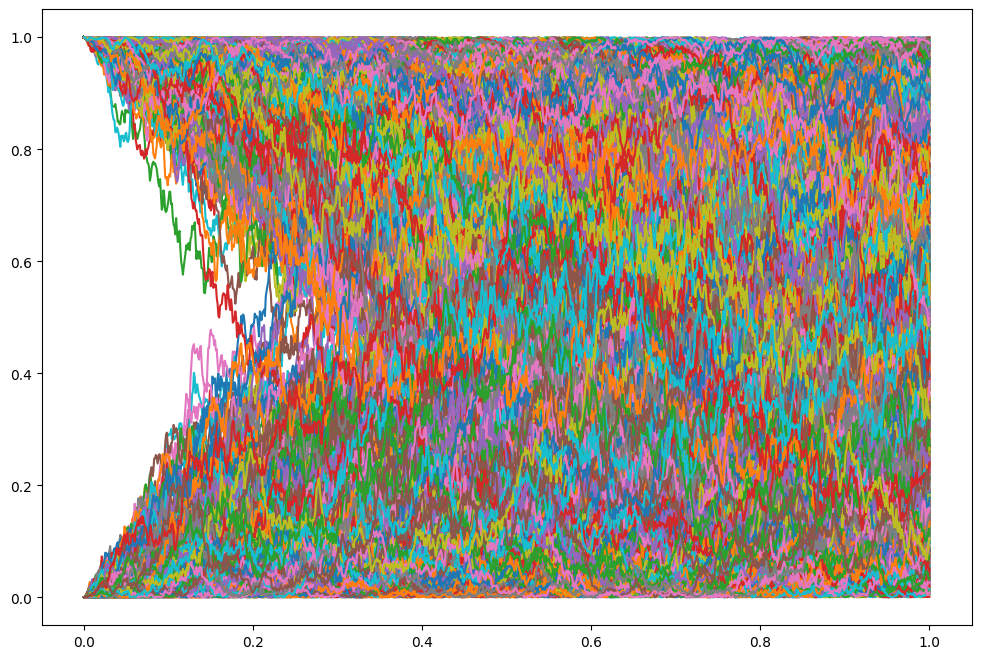

In [112]:
import math

# t,V = get_samples(n=1)

# def get_ddsm_sample()
#     return

def euler_maruyama_ddsm(M=100,N=1000,D=1, T=1.0, s=1.0,a=1.0, b=1.0,eps=1e-5,x0=0.0):
    print('hello')
    #s=a=b=1
    t = torch.arange(N+1)/N # t=0,1/N,2/N,...,N/N
    dt = torch.tensor(T/N)
    dW = math.sqrt(dt)*np.random.randn()

    
    if x0 is None:
        V=torch.randint(2, (M,N+1,D))
        V=V - eps*V + eps*(1-V)
    else:
        V = x0*torch.ones(M,N+1,D) -eps*x0 + eps*(1-x0)

    v0 = V[:,0]
    #dV= 0.5*s*(a*(1-V)- b*V)*dt+ torch.sqrt((V*(1-V)))*dW

    for i in range(N):

        dw = torch.sqrt(dt)*torch.randn(M,D)
        v1 = torch.clamp(v0 + 0.5*s*(a*(1-v0)- b*v0)*dt+ torch.sqrt((v0*(1-v0)))*dw,min=0,max=1)
        V[:,i+1] = v1
        v0 = v1

    return t,V

N=1000
M=1000
t,V= euler_maruyama_ddsm(M=M,N=N,D=1, T=1.0, s=1.0,a=1.0, b=1.0,x0=None)

plt.figure(figsize=(12, 8))
for i in range(M):
    plt.plot(t,V[i,:,0])

plt.show()

hello


<AxesSubplot: ylabel='Density'>

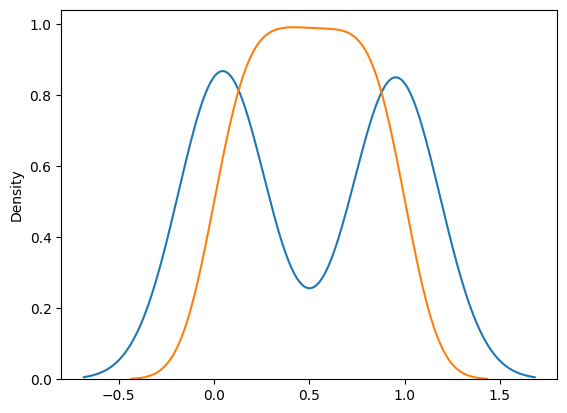

In [119]:
import seaborn as sns

ntrials = 10000
N=10000
t,X = euler_maruyama_ddsm(M=ntrials,N=N,D=1, T=1.0, s=1.0,a=1.0, b=1.0,x0=None)

sns.kdeplot(X[:,1000,0],bw_method=0.5)

'''
# We create bins for the histograms.
bins = np.linspace(-0.1, 1.1, 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

#time point to plot density
n=N
print(X.shape)
hist, _ = np.histogram(X[:,1000,0], bins=bins)
ax.plot((bins[1:] + bins[:-1]) / 2, hist,)
        #{5: '-', 50: '.', 900: '-.', }[i],
        #label=f"t={i * dt:.2f}")
ax.legend()
'''
U=torch.rand(ntrials)
sns.kdeplot(U,bw_method=0.5)

In [21]:
################# for one class  with line plot ##############

def visualize_diffusion(timepoints, samples, plot_name, title="Diffusion Process", num_samples_to_plot=1000):  

    # Visualize the diffusion process at different time points.
    plt.figure(figsize=(12, 8))
    for i, t in enumerate(timepoints):
        # Assuming samples are 2-dimensional for visualization
        #print(timepoints[i], samples[0, i, 0])
        plt.plot(timepoints[i].to(torch.float64), samples[0, i, 0],'bo')
        #plt.plot(timepoints[i].to(torch.float64), samples[0, i, 0], color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=12)
 
        #plt.plot(timepoints, samples[0, i, 0])
        
    plt.title(title)
    plt.xlabel("Time(t)")
    plt.ylabel("Xt")
    plt.legend()
    #plt.savefig(f'/home/fe/twang/ddsm-main/sudoku/{plot_name}.png')
    plt.show()

############# for 1 class and 9 classes ###################

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


torch.Size([400]) torch.Size([50000, 400, 8])
samples torch.Size([50000, 400, 8])


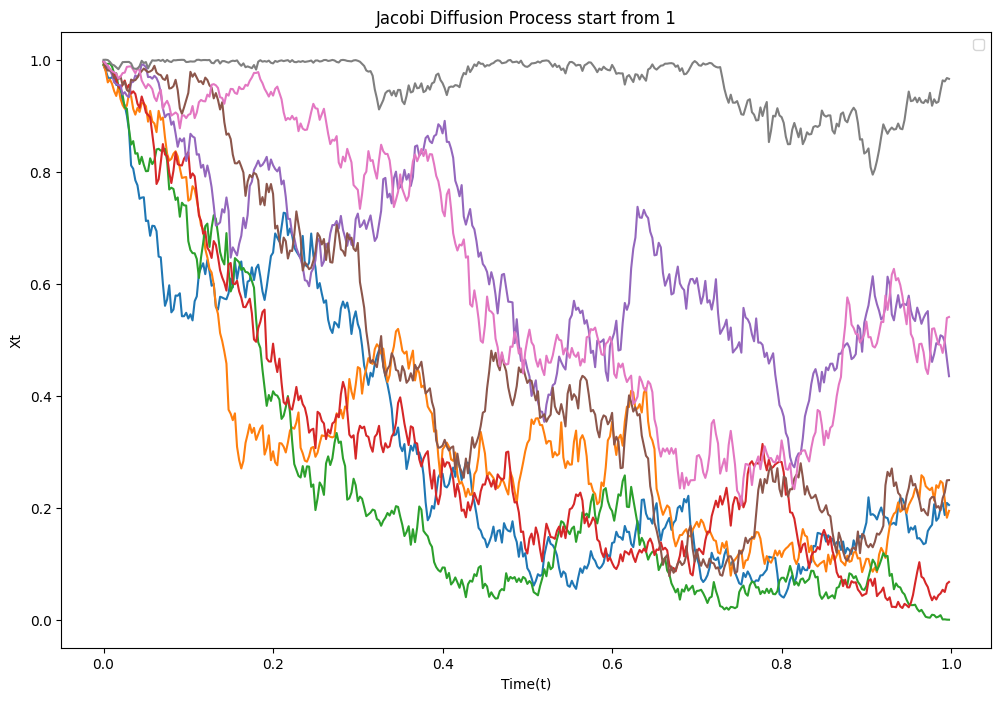

In [22]:
plot_name= 'steps400_cat9_time1_0_samples50000_from1.png'
print(timepoints.shape, v_one.shape)
#print(timepoints)
visualize_diffusion_scatter(timepoints, v_one, plot_name, title="Jacobi Diffusion Process start from 1", num_samples_to_plot=1000)
#visualize_diffusion(timepoints, v_one, plot_name, title="Jacobi Diffusion Process start from 1", num_samples_to_plot=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


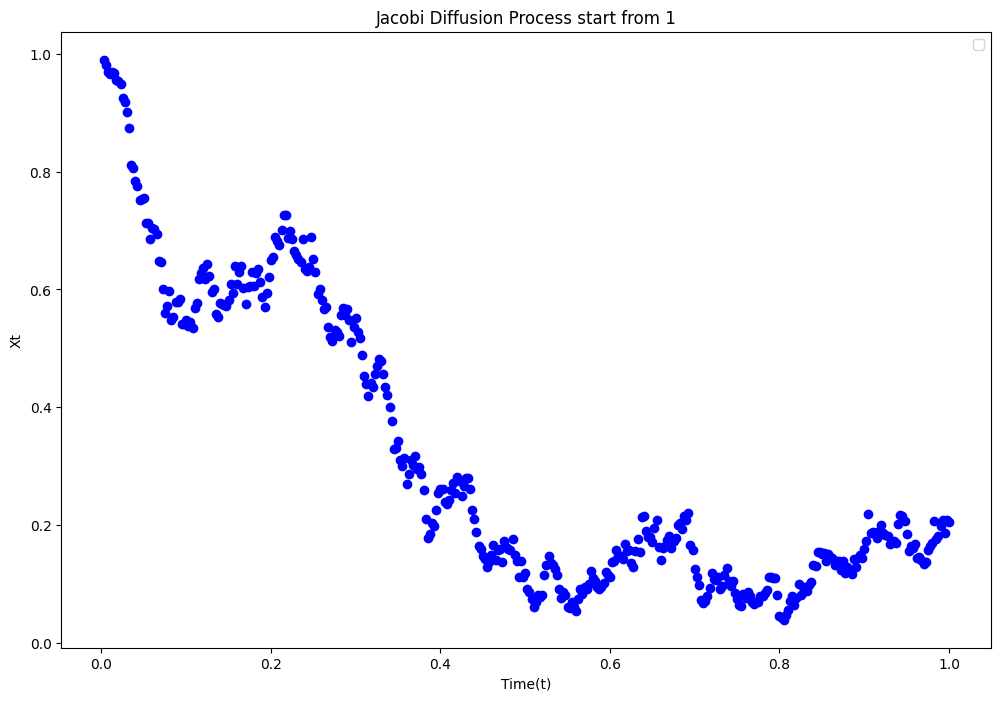

In [62]:
visualize_diffusion(timepoints, v_one, plot_name, title="Jacobi Diffusion Process start from 1", num_samples_to_plot=1000)

torch.Size([400, 8])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


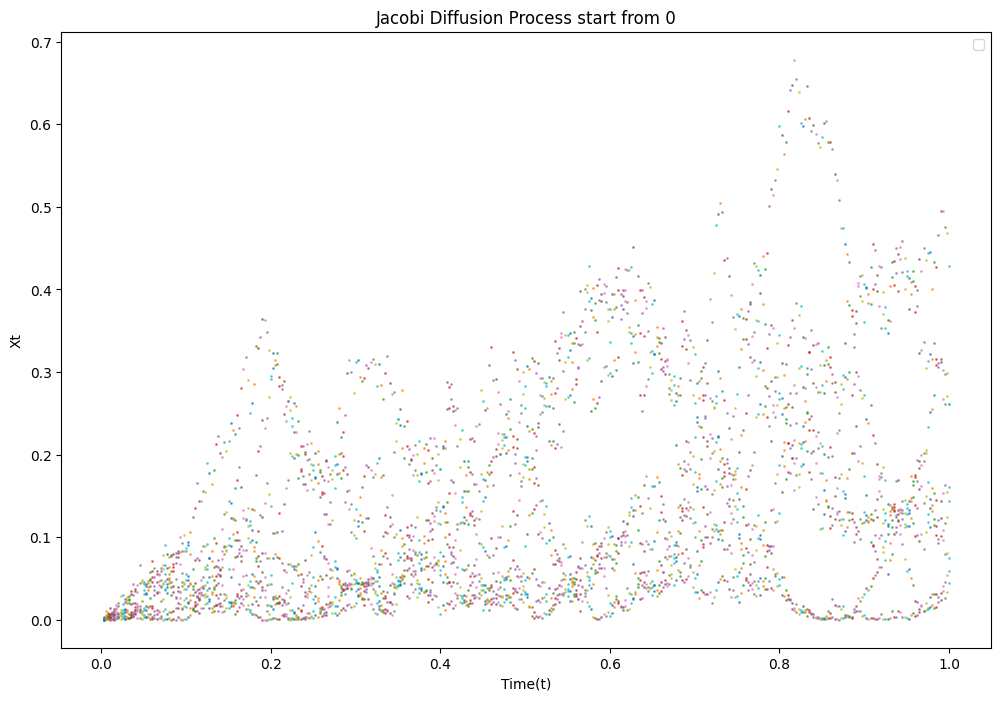

In [63]:
plot_name= 'steps400_cat9_time1_0_samples50000_from0.png'
visualize_diffusion_scatter(timepoints, v_zero, plot_name, title="Jacobi Diffusion Process start from 0", num_samples_to_plot=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


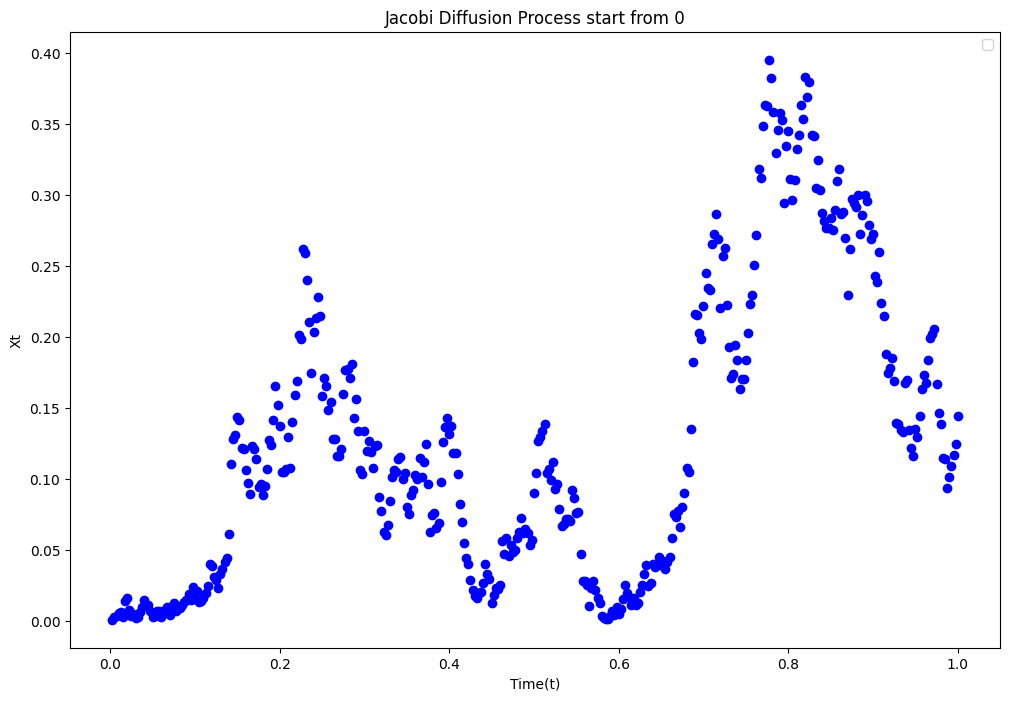

In [64]:
visualize_diffusion(timepoints, v_zero, plot_name, title="Jacobi Diffusion Process start from 0", num_samples_to_plot=1000)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(80,)
0.0025
range(0, 400)
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([])
torch.Size([]

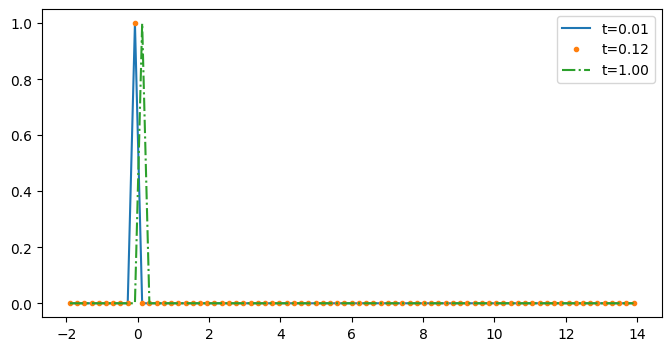

In [118]:
######################### PDF Drawing ##########################
bins = np.linspace(-2., 14., 80)
print(bins.shape)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
samples= v_zero
#v_one= samples
dt= (1-0)/400
print(dt)
print(range(samples.shape[1]))

for i in range(samples.shape[1]):
    
    X= samples[0, i, 0]
    print(X.shape)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 399):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 399: '-.'}[i],
                label=f"t={i * dt:.2f}")
    ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(50000, 400, 8)
(X[0, i, 0]: () 0.0031281820023593117
n: 400
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.ndarray'> (10000,)
<class 'numpy.n

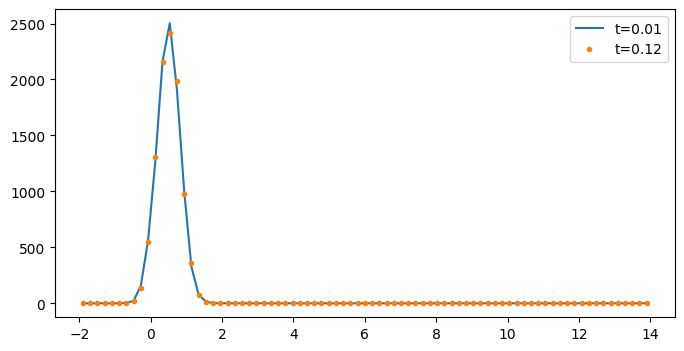

In [133]:
sigma = 1.  # Standard deviation.
mu = 10.  # Mean.
tau = .05  # Time constant.
#dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
n= 400
dt= 1/ 400
t = np.linspace(0., T, n)  # Vector of times.
sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)
ntrials = 10000
#X = np.zeros(ntrials)
samples = v_zero.numpy()
print(samples.shape)
print('(X[0, i, 0]:', samples[0, 1, 0].shape, samples[0, 1, 0])

# We create bins for the histograms.
bins = np.linspace(-2., 14., 80)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
print('n:', n)
for i in range(n):
    # We update the process independently for
    # all trials
    X= dt * (-(samples[0,i,0] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn(ntrials)
    
    print(type(X), X.shape)
    # We display the histogram for a few points in
    # time
    if i in (5, 50, 900):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {5: '-', 50: '.', 399: '-.', }[i],
                label=f"t={i * dt:.2f}")
    ax.legend()

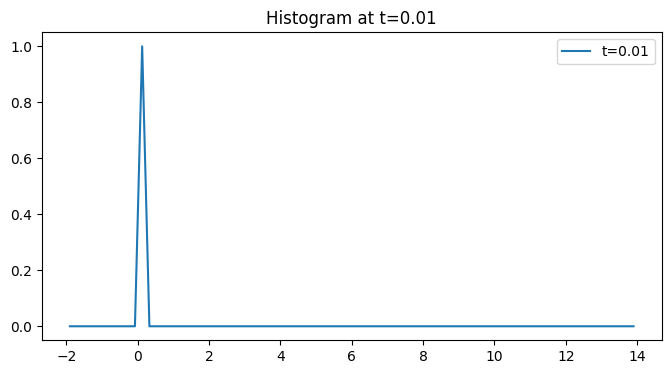

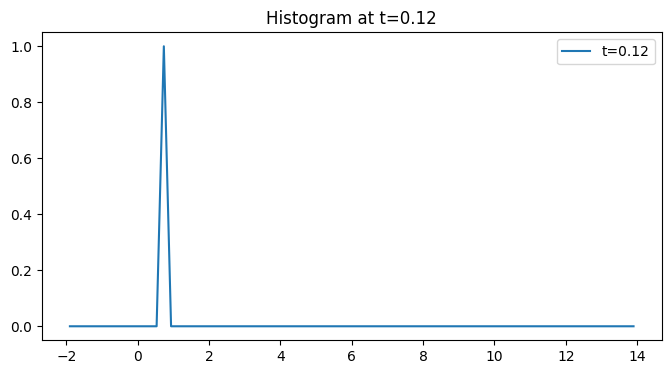

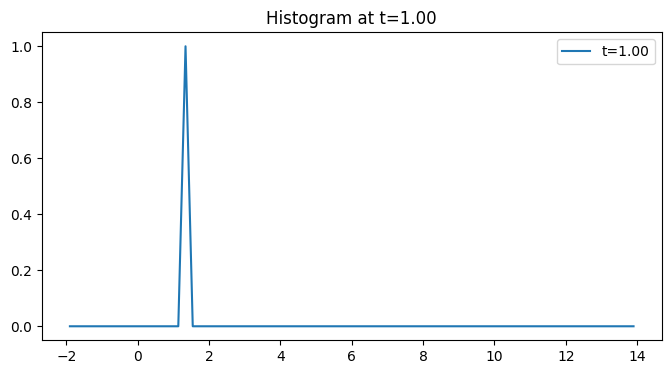

<function matplotlib.pyplot.close(fig=None)>

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# 假设的 samples 数组，需要替换为实际的 v_zero 数据
samples = np.random.randn(1, 400, 1)  # 示例数据

bins = np.linspace(-2., 14., 80)
dt= (1-0)/400

# 为每个特定时间点生成图
for i in [5, 50, 399]:
    fig, ax = plt.subplots(1, 1, figsize=(8, 4))
    X= samples[0, i, 0]
    hist, _ = np.histogram(X, bins=bins)
    ax.plot((bins[1:] + bins[:-1]) / 2, hist, label=f"t={i * dt:.2f}")
    ax.legend()
    plt.title(f"Histogram at t={i*dt:.2f}")
    plt.savefig(f"/home/fe/twang/ddsm-main/sudoku/histogram_{i}.png")  # 保存图像
    #plt.close(fig)  # 关闭图表，以免占用过多内存
plt.show()
plt.close

In [107]:
from PIL import Image

# 加载之前保存的图像
images = [Image.open(f"/home/fe/twang/ddsm-main/sudoku/histogram_{i}.png") for i in [5, 50, 399]]

# 确定拼接后图像的总宽度和最大高度
total_width = sum(image.width for image in images)
max_height = max(image.height for image in images)

# 创建新的拼接图像
new_im = Image.new('RGB', (total_width, max_height))

x_offset = 0
for im in images:
  new_im.paste(im, (x_offset,0))
  x_offset += im.width

new_im.save('/home/fe/twang/ddsm-main/sudoku/combined_histograms.png')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0.0025
range(0, 400)


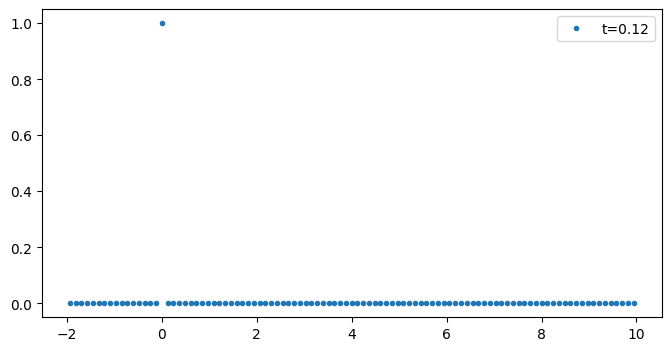

In [67]:
bins = np.linspace(-2., 10., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
samples= v_zero
#v_one= samples
dt= (1-0)/400
print(dt)
print(range(samples.shape[1]))

for i in range(samples.shape[1]):
    
    X= samples[0, i, 0]
    #print(X, X.shape)
    # We display the histogram for a few points in
    # time
    if i== 50:
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
        {50: '.'}[i],
        label=f"t={i * dt:.2f}")
    ax.legend()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


0.0025
range(0, 400)


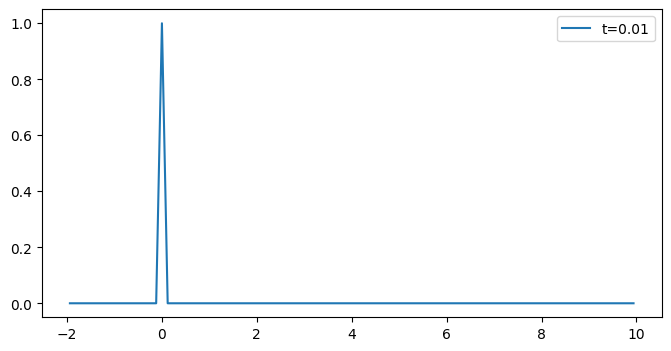

In [68]:
bins = np.linspace(-2., 10., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
samples= v_zero
#v_one= samples
dt= (1-0)/400
print(dt)
print(range(samples.shape[1]))

for i in range(samples.shape[1]):
    
    X= samples[0, i, 0]
    if i== 5:
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
        {5: '-'}[i],
        label=f"t={i * dt:.2f}")
    ax.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

0.0025
range(0, 400)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

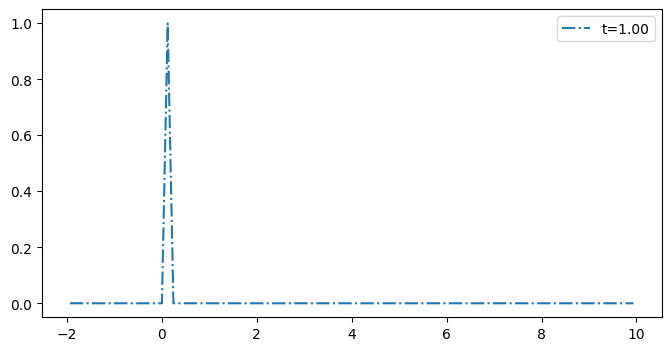

In [70]:
bins = np.linspace(-2., 10., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
samples= v_zero
#v_one= samples
dt= (1-0)/400
print(dt)
print(range(samples.shape[1]))

for i in range(samples.shape[1]):
    
    X= samples[0, i, 0]
    if i== 399:
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
        {399: '-.'}[i],
        label=f"t={i * dt:.2f}")
    ax.legend()

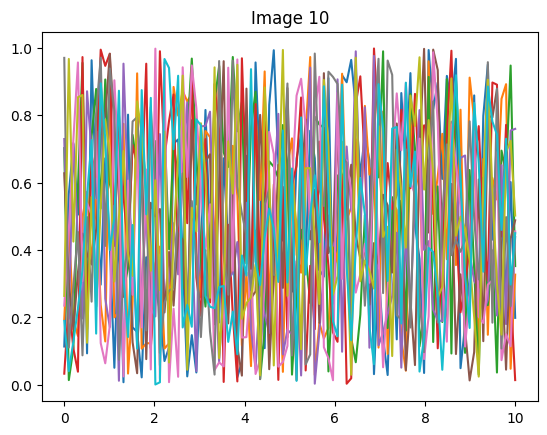

In [74]:
import matplotlib.pyplot as plt
import numpy as np

# 循环变量
i = 0

# 循环次数
num_iterations = 10

# 循环体内
while i < num_iterations:

    # 生成随机数据
    x = np.linspace(0, 10, 100)
    y = np.random.rand(100)

    # 绘制图像
    plt.plot(x, y)

    # 设置标题
    plt.title(f"Image {i+1}")

    # 增加循环变量
    i += 1

# 显示图像
plt.show()


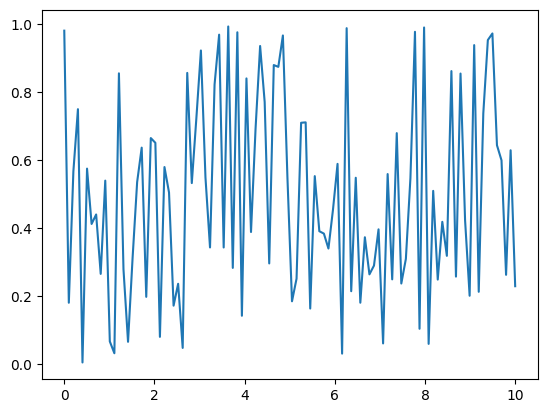

In [75]:
import torch
import matplotlib.pyplot as plt

# 创建Tensor
x = torch.linspace(0, 10, 100)
y = torch.rand(100)

# 绘制图像
plt.plot(x, y)

# 显示图像
plt.show()
